In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier

In [3]:
from sklearn.datasets import load_iris
data = load_iris()

X = data.data       # Features
y = data.target     # Labels

df = pd.DataFrame(X, columns=data.feature_names)
df['Target'] = y
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
dt = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt.fit(X_train, y_train)


,criterion,'entropy'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [6]:
y_pred_dt = dt.predict(X_test)


In [7]:
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.9777777777777777

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.93      1.00      0.96        13
           2       1.00      0.92      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



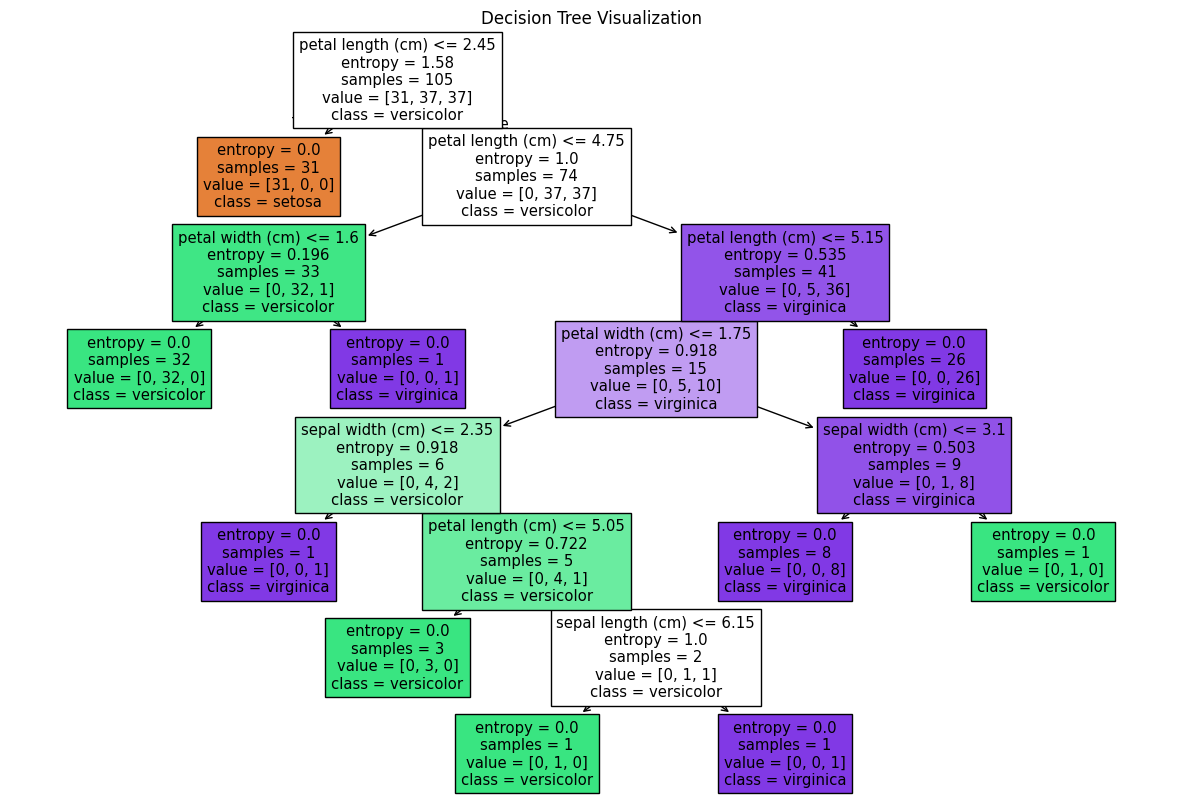

In [8]:
plt.figure(figsize=(15,10))
plot_tree(dt, feature_names=data.feature_names, class_names=data.target_names, filled=True)
plt.title("Decision Tree Visualization")
plt.show()

In [9]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [10]:
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
knn.fit(X_train_scaled, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [11]:
y_pred_knn = knn.predict(X_test_scaled)

In [12]:
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))

KNN Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



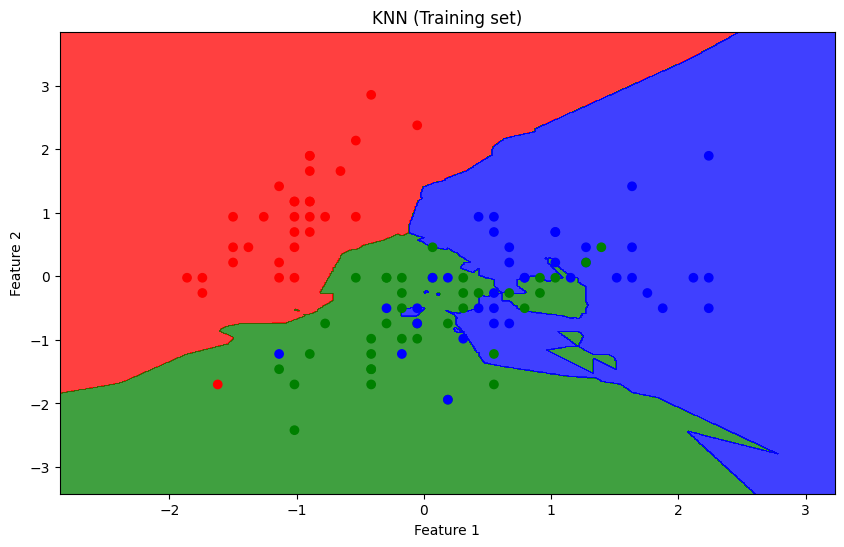

In [13]:
X_vis = df.iloc[:, [0, 1]].values
y_vis = df.iloc[:, -1].values

X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(X_vis, y_vis, test_size=0.3, random_state=42)
sc_vis = StandardScaler()
X_train_vis = sc_vis.fit_transform(X_train_vis)
X_test_vis = sc_vis.transform(X_test_vis)

knn_vis = KNeighborsClassifier(n_neighbors=5)
knn_vis.fit(X_train_vis, y_train_vis)

from matplotlib.colors import ListedColormap

X1, X2 = np.meshgrid(np.arange(start=X_train_vis[:,0].min()-1, stop=X_train_vis[:,0].max()+1, step=0.01),
                     np.arange(start=X_train_vis[:,1].min()-1, stop=X_train_vis[:,1].max()+1, step=0.01))

plt.figure(figsize=(10,6))
plt.contourf(X1, X2, knn_vis.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red','green','blue')))
plt.scatter(X_train_vis[:,0], X_train_vis[:,1], c=y_train_vis, cmap=ListedColormap(('red','green','blue')))
plt.title('KNN (Training set)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()